## Experiment 2

Implement Simple LInear regresseion algorithm on a suitable dataset

Simple linear regression
- Supervised algorithm
- Defines relationship between dependent varieable and a single independent variable
- Greater portion of dependent variables's variance that can be expalined by the independent variable, more accurate is the prediction

It tries to find the best fit line by minimizing the difference between predicted value and the orignal value in the data.



I uses method of least squares to determine the straight line.

Line can be represented with equation : y = b0 ​+b1x + ϵ
-  y = dependent variable 
-  x = independent variable 
-  b0 = intercept ( value of y when x -> 0)
-  b1 = slope
-   ϵ = error term 

#Assumptions of linear regression 

- Linearity: Relationship between features and target is linear.

- Independence: Observations are independent of each other.

- Homoscedasticity: Constant variance of errors.

- Normality: Errors are normally distributed.

- No multicollinearity: Independent variables are not highly correlated.

Types of linear regression : 
- A) simple linear regression

- B) Multiple linear regression

### Simple Linear Regression

importing necessary libraries

In [3]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# importing dataset
df = pd.read_csv("datasets/archive/Salary.csv")

In [6]:
print(df.shape)
df.head()

(35, 2)


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [8]:
x = df[['YearsExperience']]
y = df['Salary']

In [ ]:
#train test split (test size = 20% and random state = 42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# scaling values 
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [ ]:
# model training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# prediction
y_pred = model.predict(X_test_scaled)

In [ ]:
# evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [14]:
print(f"R2 : {r2}")
print(f"MSE : {mse}")

R2 : 0.8914234140042778
MSE : 55761791.30626023


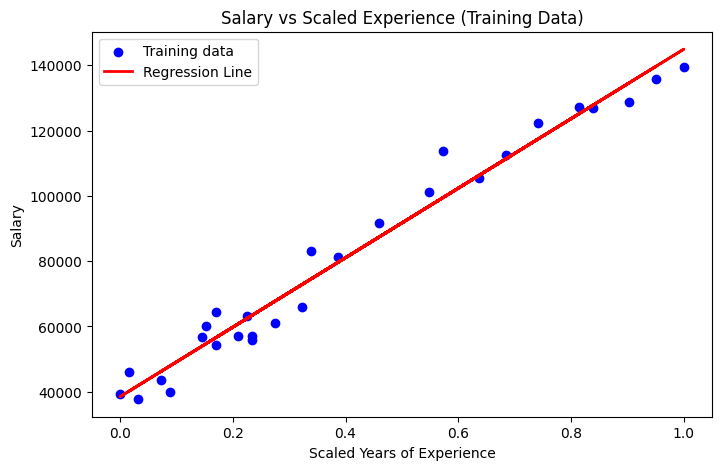

In [ ]:
# visualization

plt.figure(figsize=(8,5))
plt.scatter(X_train_scaled, y_train, color='blue', label='Training data')
plt.plot(X_train_scaled, model.predict(X_train_scaled), color='red', linewidth=2, label='Regression Line')
plt.title("Salary vs Scaled Experience (Training Data)")
plt.xlabel("Scaled Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

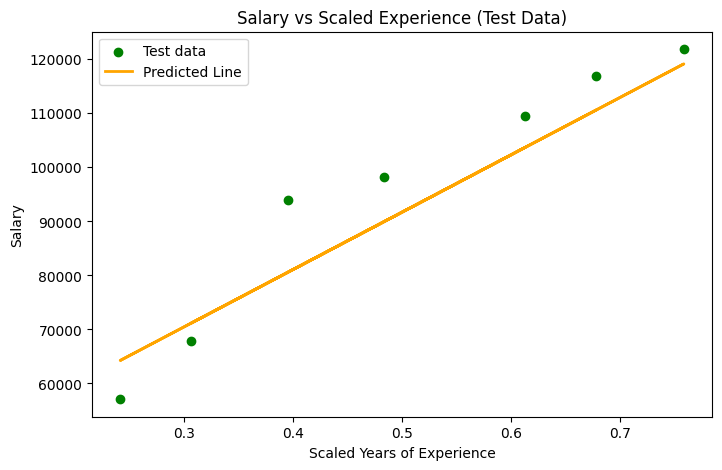

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(X_test_scaled, y_test, color='green', label='Test data')
plt.plot(X_test_scaled, y_pred, color='orange', linewidth=2, label='Predicted Line')
plt.title("Salary vs Scaled Experience (Test Data)")
plt.xlabel("Scaled Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()